# MATH11240: Numerical methods for data
## Computer Assignment 2

### Academic misconduct

The assessment is primarily summative in nature. You are expected to be aware of and abide by University policies on academic misconduct.

- [School of Mathematics academic misconduct advice and policies](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)
- [Academic Services academic misconduct information](https://www.ed.ac.uk/academic-services/students/conduct/academic-misconduct)

**This is an individual assignment - do not share your work with another student or copy the work of another student.**

If you use any resources (e.g. textbooks or websites) then include appropriate references in your solutions. Course materials do not need to be referenced, but you should clearly state which results you are using.


### Code commentary

Your code should be extensively commented, with the functionality of each line of code explained with a comment. This is to test your understanding of the code you have written. Up to half of the marks associated with the coding part of a question may be deducted for a missing, incomplete, or inaccurate code commentary.

Your comments should explain what the code does, as well as why it does it.

The following provides an example of the expected level of commenting.

In [281]:
def is_prime(n):
    """
    Return whether an input positive integer is prime.
    """
    
    if n == 1:        # If n is 1 ...
        return False  # ... then n is not prime
    
    for i in range(2, n):  # Test integers i from 2 to n - 1 inclusive
        if n % i == 0:     # If n is divisible by i ...
            return False   # ... then n is not prime
    # If n is not divisible by any integers from 2 to n - 1 inclusive then n is
    # prime
    return True

# A gravity surveying inverse problem

An unkown mass distribution with density $f(t)$ is located at depth $d$ below the surface see Figure below


<img src="gravity.png" alt="fishy" class="bg-primary mb-1" width="450px">

We assume that there is no mass outside this source which provides a gravity field everywhere. At the surface, along the $s$ axis from $0$ and $1$, which we refer to as $g(s)$. The two functions are related with each other through the following integral equation

$$
g(s)=\int_{0}^{1}\frac{d}{d^{2}+(s-t)^{3/2}}f(t)dt
$$

The associated inverse problem of gravity surveying is obtained by swapping the ingredients of the forward problem and writing it as 

$$
\int_{0}^{1}K(s,t)f(t)dt=g(s), \qquad 0 \leq s \leq 1, 
$$
where the function $K$ which represents the model, is given by 

$$
K(s,t)=\frac{d}{d^{2}+(s-t)^{3/2}}
$$


Assume that we know the values of $g$ at real points $0 \leq s_{1}<s_{2}<\cdots<s_{n} \leq 1$. Then we may approximate the integral above, with for example, the trapezoidal rule as 

$$
\int_{0}^{1}K(s,t)f(t)dt \simeq \sum_{i=1}^{k-1} \frac{K(s,t_{i+1})f(t_{i+1})+K(s,t_{i})f(t_{i})}{2} \Delta t_{i}, \quad \Delta t_{i}=t_{i+1}-t_{i}
$$

where the vector $\mathbf{t}=[t_{1},t_{2},\cdots,t_{k}]^{T} \in \mathbb{R}^{k}$, containing the points at which the unkown function $f$ will be evaluated.  

By denoting $x_{l}=f(t_{l}), l=1,\cdots,k$, and $y_{j}=g(s_{j}), j=1,\cdots,n$ and assuming some additive noise on the data one obtains the following equation 
$$
\mathbf{y}=A\mathbf{x}+\boldsymbol{\varepsilon}
$$


## Question 1

Write down a formula for the matrix $A$. In addition write down a Python function that takes as inputs the vectors $\mathbf{s}$ and $\mathbf{t}$ and returns the matrix $A$
&nbsp;&nbsp;&nbsp;&nbsp;            [**Marks 3**]  


# <mark>Solution:<mark> 

When we expand $\sum_{i=1}^{k-1} \frac{K(s,t_{i+1})f(t_{i+1})+K(s,t_{i})f(t_{i})}{2} \Delta t_{i}, \quad \Delta t_{i}=t_{i+1}-t_{i}$ for a given s value, say $s_{1}$, we get:

$$
g(s_{1}) = \int_{0}^{1}K(s_{1},t)f(t)dt \simeq \frac{\Delta t}{2}(K(s_{1}, t_{1})f(t_{1}) + 2K(s_{1}, t_{2})f(t_{2}) + 2K(s_{1}, t_{3})f(t_{3}) + \ldots + K(s_{1}, t_{k})f(t_{k}))
$$

$$
g(s_{2}) = \int_{0}^{1}K(s_{2},t)f(t)dt \simeq \frac{\Delta t}{2}(K(s_{2}, t_{1})f(t_{1}) + 2K(s_{2}, t_{2})f(t_{2}) + 2K(s_{2}, t_{3})f(t_{3}) + \ldots + K(s_{2}, t_{k})f(t_{k}))
$$

.

.

.

$$
g(s_{n}) = \int_{0}^{1}K(s_{n},t)f(t)dt \simeq \frac{\Delta t}{2}(K(s_{n}, t_{1})f(t_{1}) + 2K(s_{n}, t_{2})f(t_{2}) + 2K(s_{n}, t_{3})f(t_{3}) + \ldots + K(s_{n}, t_{k})f(t_{k}))
$$

We can define $x$ and $y$ as follows:

$$
x = \begin{bmatrix} f(t_1) \\ f(t_2) \\ \vdots \\ f(t_k) \end{bmatrix}, \quad y = \begin{bmatrix} g(s_1) \\ g(s_2) \\ \vdots \\ g(s_n) \end{bmatrix}
$$

and

$$
A = \frac{\Delta t}{2} \begin{bmatrix} K(s_1, t_1) & 2K(s_1, t_2) & 2K(s_1, t_3) & \cdots & K(s_1, t_k) \\ K(s_2, t_1) & 2K(s_2, t_2) & 2K(s_2, t_3) & \cdots & K(s_2, t_k) \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ K(s_n, t_1) & 2K(s_n, t_2) & 2K(s_n, t_3) & \cdots & K(s_n, t_k) \end{bmatrix}
$$

To generalise, if the discretisation intervals are non-uniform, we would get:

$$
A = \frac{1}{2} \begin{bmatrix} \Delta t_1 K(s_1, t_1) & (\Delta t_1 + \Delta t_2) K(s_1, t_2) & (\Delta t_2 + \Delta t_3) K(s_1, t_3) & \cdots & \Delta t_{k-1} K(s_1, t_k) \\ \Delta t_1 K(s_2, t_1) & (\Delta t_1 + \Delta t_2) K(s_2, t_2) & (\Delta t_2 + \Delta t_3) K(s_2, t_3) & \cdots & \Delta t_{k-1} K(s_2, t_k) \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ \Delta t_1 K(s_n, t_1) & (\Delta t_1 + \Delta t_2) K(s_n, t_2) & (\Delta t_2 + \Delta t_3) K(s_n, t_3) & \cdots & \Delta t_{k-1} K(s_n, t_k) \end{bmatrix}
$$

The below function is coded to handle such cases as well.

In [282]:
import os
os.chdir("/Users/metedibi/Desktop/Semester 2/Numerical Methods for Data")

In [283]:
import numpy as np

def create_A_matrix(s_array, t_array, d = 1):
    #get dimensions
    n = len(s_array)  
    k = len(t_array)  
    
    #create empty matrix
    A = np.zeros((n, k))
    
    #define function
    def K(s, t): 
        return d / (d**2 + np.abs((s - t))**(3/2))
    

    ##fill the matrix according to the generalised rule given above
    for i in range(n):
        for j in range(k):
            if j == 0:
                # for the first column
                delta_t = t_array[j+1] - t_array[j]
            elif j == k-1:
                # for the last column
                delta_t = t_array[j] - t_array[j-1]
            else:
                # for all other columns
                delta_t = ((t_array[j] - t_array[j-1]) + (t_array[j+1] - t_array[j])) 
            
            A[i, j] = K(s_array[i], t_array[j]) * delta_t
    
    return A/2


## Question 2

Now take $k=100$  and $n=100$ hence $s,t$ are vectors uniformly spaced in $[0,1]$. Use the code from the previous question when $d=1$, calculate the SVD of the matrix and plot its singular values, what do you observe? &nbsp;    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   [**Marks 1**]  


## <mark>Solution <mark>

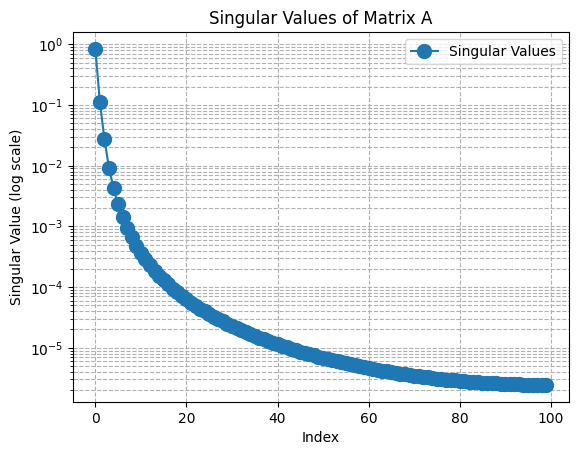

In [284]:
import matplotlib.pyplot as plt

##discretisation
t_array = np.linspace(0,1,100)
s_array = np.linspace(0,1,100)


#create the matrix
A = create_A_matrix(s_array, t_array)

#get singular values
_, singular_values, _ = np.linalg.svd(A, full_matrices=True)


##plotting
plt.semilogy(singular_values, 'o-', markersize=10, label='Singular Values')
plt.title('Singular Values of Matrix A')
plt.xlabel('Index')
plt.ylabel('Singular Value (log scale)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()





If we consider small perturbations in data, ie. we have two nearby problems $Ax^\dagger = y^\dagger$, $Ax = y$ where $y = y^\dagger + \epsilon$

We have that

$$
x - x^\dagger = \sum_{i=1}^{n} \frac{u_i^T(y^\dagger + \epsilon)}{\sigma_i}v_i - \sum_{i=1}^{n} \frac{u_i^T y^\dagger}{\sigma_i}v_i
$$

$$
= \sum_{i=1}^{n} \frac{u_i^T \epsilon}{\sigma_i} v_i
$$

We see that if the singular values $\sigma_i$ are quite low, the reciprocal $1/\sigma_i$ will be quite high, which leads to a system that is very sensitive to even the smallest perturbations. From the plot, we observe that the majority of the singular values are quite low, so this demonstrates the phenomenon of sensitivity to perturbations in the context of this system.


In [285]:
is_zero_exact = np.any(singular_values == 0)

if is_zero_exact:
    print("At least one singular value is exactly zero. The matrix is singular and not invertible.")
else:
    print("No singular values are exactly zero. The matrix is not singular.")

No singular values are exactly zero. The matrix is not singular.


We also verify that all our singular values are non-zero. So we have a severly ill conditioned matrix, quite close to being singular, but is still nonsingular.

## Question 3

Load the data $\mathbf{y}$ in the file text1.txt using the command below. 

In [286]:
data_y = np.loadtxt('test1.txt', dtype=float)

Solve the least squares problem using the function *np.linalg.lstsq(A,y)[0]*. What do you observe and how can this be explained (*Hint*: You might want to look at the conditioning number of the matrix $A'A$) &nbsp;&nbsp;&nbsp;  &nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;  &nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;  &nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;  &nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;  &nbsp;     [**Marks 1**] 


## <mark>Solution <mark>

<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/1704418961.py:23: SyntaxWarning: invalid escape sequence '\c'
  axs[1].plot(t_vec, Ax, label='Prediction $A \cdot x$')
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/1704418961.py:27: SyntaxWarning: invalid escape sequence '\c'
  axs[1].set_title('Prediction $A \cdot x$ and Original Data $y$ with LS Solution')


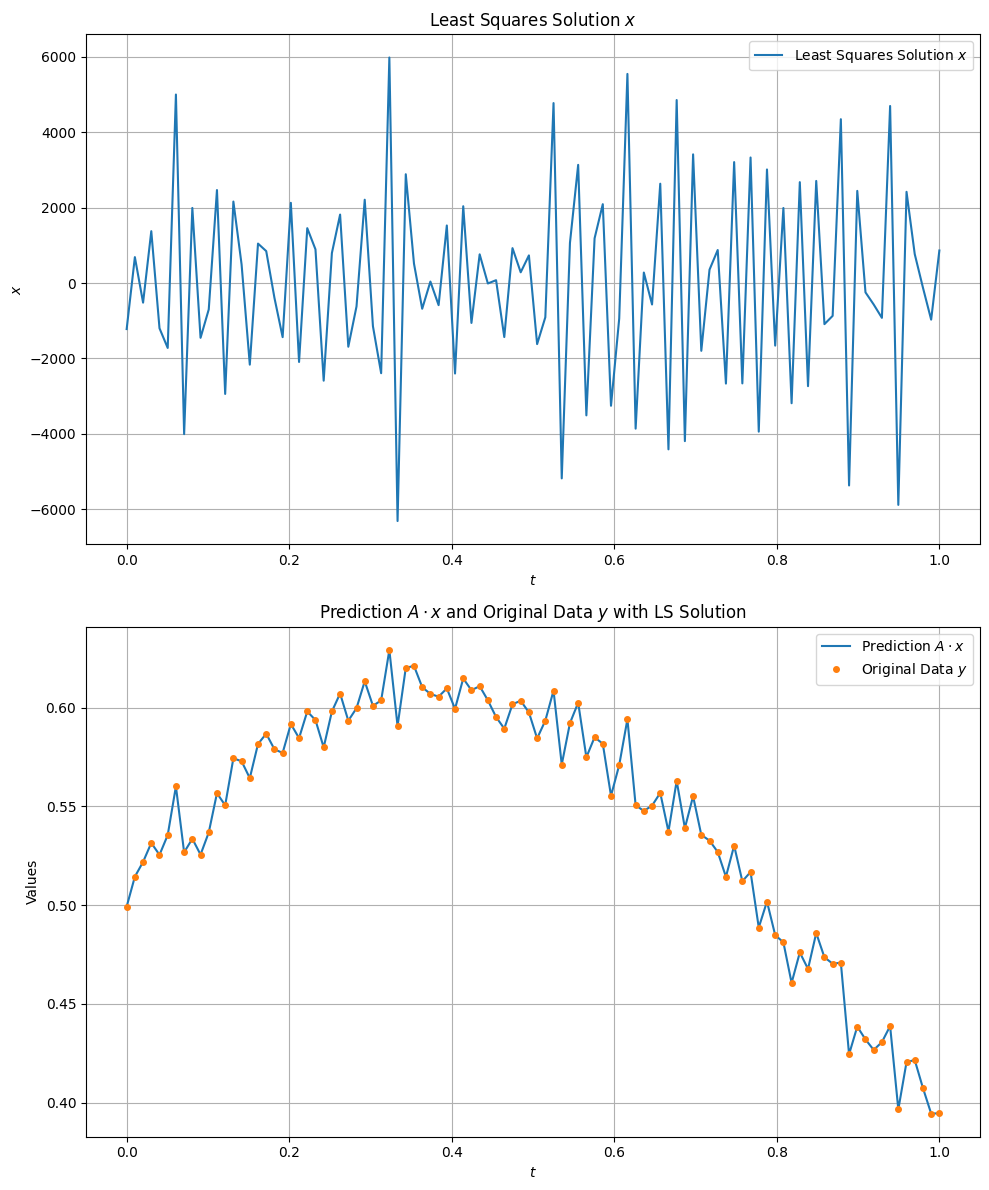

In [287]:
t_vec = np.linspace(0, 1, 100)  
s_vec = np.linspace(0, 1, 100)
##solve the least squares
x = np.linalg.lstsq(A, data_y, rcond=None)[0]


#make some predictions
Ax = np.dot(A, x)


##plotting the solution and predictions
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# plot the solution
axs[0].plot(t_vec, x, label='Least Squares Solution $x$')
axs[0].set_xlabel('$t$')
axs[0].set_ylabel('$x$')
axs[0].set_title('Least Squares Solution $x$')
axs[0].legend()
axs[0].grid(True)

# plot the prediction
axs[1].plot(t_vec, Ax, label='Prediction $A \cdot x$')
axs[1].plot(t_vec, data_y, 'o', markersize=4, label='Original Data $y$')
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('Values')
axs[1].set_title('Prediction $A \cdot x$ and Original Data $y$ with LS Solution')
axs[1].legend()
axs[1].grid(True)

# show plot
plt.tight_layout()
plt.show()



We see that the least square solution overfits to the noisy data since matrix A is ill conditioned. Thus, it is not stable or generalisable.


We know that a vector ${\hat{x}} \in \mathbb{R}^k$ will minimise $\|Ax - y\|_2$ if and only if it solves the normal equations

$$
A^TAx = A^Ty.
$$

The solution is given by

$$
{\hat{x}} = (A^TA)^{-1} A^Ty.
$$

In terms of the singular value decomposition $A = U\Sigma V^T$, this is equivalent to:

$$
{\hat{x}} = V\Sigma^+U^Ty
$$

since we found out that all singular values are positive, this is equivalent to:

$$
{\hat{x}} = V\Sigma^{-1}U^Ty = A^{-1}y
$$

Again, the reciprocal of the singular values are going to be quite high, which we can see by the huge elements in the estimation $\hat{x}$. In fact, we know that:

$$
\frac{\|\hat{x} - x\|_p}{\|x\|_p}
$$

is dependent on $\kappa_p (A^T A) = \kappa_p (A)^2. = \frac{\sigma_{1}^2}{\sigma{n}^2}$, which in our case is quite high.

In [288]:
#condition of A
condition_number = (singular_values[0]) / (singular_values[-1])


#condition of A^T.A
condition_number_sq = (singular_values[0]**2) / (singular_values[-1]**2)

print("Condition number of A:", condition_number, "\n")


print("Condition number of A^T A:", condition_number_sq)


Condition number of A: 344826.0564693274 

Condition number of A^T A: 118905009220.18779


## Question 4

As we discussed in lectures a possible way to deal with ill-posed inverse problems is *regularisation*. A simple regularisation technique that we discussed in lectures was truncated SVD decomposition. Write a function that takes as a input the rank used in TSVD and plots the corresponding solution   &nbsp;&nbsp; &nbsp;&nbsp;      [**Marks 1**] 


## <mark>Solution <mark>

<>:42: SyntaxWarning: invalid escape sequence '\c'
<>:45: SyntaxWarning: invalid escape sequence '\c'
<>:46: SyntaxWarning: invalid escape sequence '\c'
<>:42: SyntaxWarning: invalid escape sequence '\c'
<>:45: SyntaxWarning: invalid escape sequence '\c'
<>:46: SyntaxWarning: invalid escape sequence '\c'
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/302132432.py:42: SyntaxWarning: invalid escape sequence '\c'
  axs[1].plot(t_vec, Ax, label='Prediction $A \cdot x$')
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/302132432.py:45: SyntaxWarning: invalid escape sequence '\c'
  axs[1].set_ylabel('$A \cdot x$')
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/302132432.py:46: SyntaxWarning: invalid escape sequence '\c'
  axs[1].set_title('Prediction $A \cdot x$ and true data y with TSVD regularisation')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called

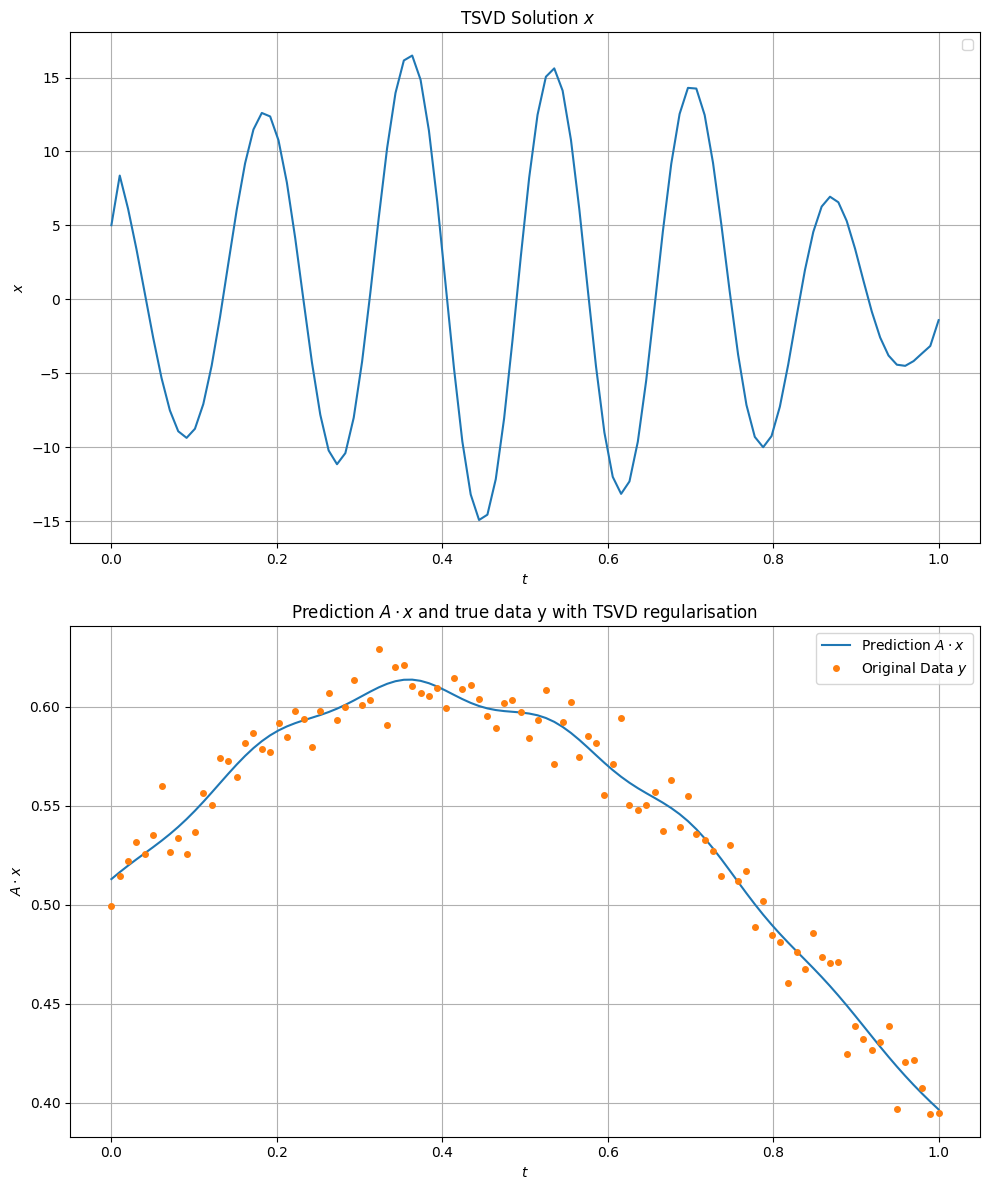

In [289]:
#getting U and V_T this time as well
U, s_vals, V_T = np.linalg.svd(A, full_matrices=True)
delta = 0.000175 #random delta value to test


##this function finds the maximum index of the singular value that is still greater than delta
def find_max_index(singular_values, delta):
    indices_above_threshold = np.where(singular_values > delta)[0]
    return np.max(indices_above_threshold)



## takes input the singular values of the matrix and the rank of TSVD
def tsvd_solution(singular_values, delta):
    max_index = find_max_index(singular_values, delta)  ##find max index
    singular_values = 1/singular_values ##take reciprocal
    singular_values[max_index + 1:] = 0 ##set elements after max element to 0
    trunc_matrix = np.diag(singular_values)  ##create the diagonal matrix
    reconstructed_matrix = V_T.T @ trunc_matrix@ U.T  ##reconstruct according to TSVD
    new_solution = reconstructed_matrix@data_y  ##get the new solution
    return new_solution




x = tsvd_solution(s_vals, delta)##getting the new solution

Ax = np.dot(A, x)##making predictions

##plotting 
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

##plot the solution
axs[0].plot(t_vec, x)
axs[0].set_xlabel('$t$')
axs[0].set_ylabel('$x$')
axs[0].set_title(' TSVD Solution $x$')
axs[0].legend()
axs[0].grid(True)

# plot the prediction Ax
axs[1].plot(t_vec, Ax, label='Prediction $A \cdot x$')
axs[1].plot(t_vec, data_y, 'o', markersize=4, label='Original Data $y$')
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$A \cdot x$')
axs[1].set_title('Prediction $A \cdot x$ and true data y with TSVD regularisation')
axs[1].legend()
axs[1].grid(True)

# show plot
plt.tight_layout()
plt.show()



We see that the solutions are now much more smooth and do not overfit to the noisy data, which suggests that regularisation achieved more generalisable results.

## Question 5

Another regularisation approach we discussed was Tikhonov regularisation.  In particular instead of minimizing the objective function $f(\mathbf{x})=||A\mathbf{x}-\mathbf{y}||^{2}_{2}$ one instead minimises the function
$$
f_{\mu}(\mathbf{x})=||A\mathbf{x}-\mathbf{y}||^{2}_{2}+\mu g(\mathbf{x})
$$
where $g(x)$ is the regularisation term. Here we choose $g(\mathbf{x})=||L\mathbf{x}||^{2}_{2}$ for an appropriatelly chosen matrix $L \in \mathbb{R}^{p\times k}$. Now take the matrix $L=I_{k \times k}$ and denote the Tikhonov regularised solution as $\mathbf{x}_{\mu}$. Calculate $\mathbf{x}_{\mu}$ for values of  100 values of $\mu$ logarithmically spaced between $10^{-8}$ and $10^{1}$. Use these solutions to draw the $L$-curve as discussed in the lectures and find based on visual inspection approximately  the value of $\mu$ that gives the best results, and plot the "best" regularised solution. (*Hint:* For calcuting the Tikhonov regularised solution think about the corresponding normal equations) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;     [**Marks 2**] 


## <mark>Solution <mark>

The normal equations are derived by setting the gradient to 0 in the expression:
$$
f_{\mu}(\mathbf{x})=||A\mathbf{x}-\mathbf{y}||^{2}_{2}+\mu g(\mathbf{x})
$$, 

with $g(\mathbf{x})=||L\mathbf{x}||^{2}_{2}$ and $L=I_{k \times k}$, this becomes:

$$
f_{\mu}(\mathbf{x})=||A\mathbf{x}-\mathbf{y}||^{2}_{2}+\mu ||\mathbf{x}||^{2}_{2}
$$, 

with the following normal equations:
$$
(A^TA + \mu I)x_{\mu} = A^Ty \iff T_{\delta}(y) = x_{\mu} = (A^TA + \mu I)^{-1}A^Ty
$$

We will then plot:

$$
\log\left(\|AT_{\mu}(y) - y\|_2\right)
$$

versus

$$
\log\left(\|LT_{\mu}(y)\|_2\right) = \log\left(\|T_{\mu}(y)\|_2\right)
$$

for 100 $\mu$ values logarithmically spaced between $10^{-8}$ and $10^{1}$. 


In [290]:
def tikhonov_solution(mu):
    ## we use = x_{\mu} = (A^TA + \mu I)^{-1}A^Ty
    first_term = np.linalg.inv((A.T@A + mu*np.eye(100)))  ##calculate first term
    second_term = A.T@data_y ##calculate second term
    return first_term @ second_term 

<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\l'
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/2282239170.py:23: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\log(||Ax_{\mu} - y||_2)$')
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/2282239170.py:24: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\log(||x_{\mu}||_2)$')


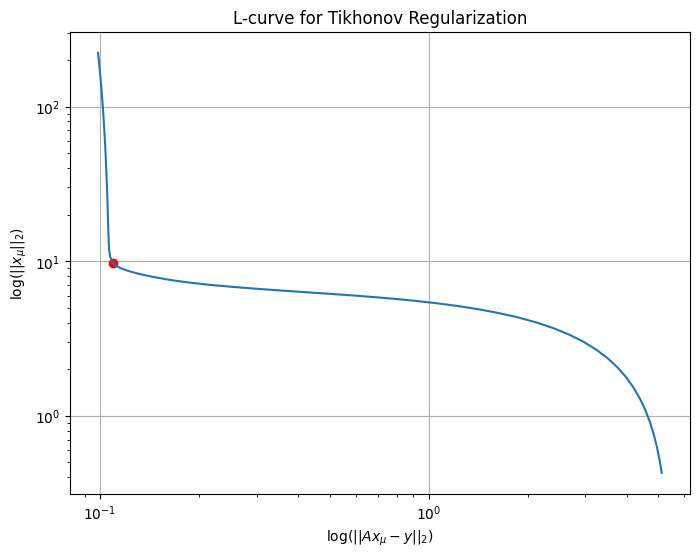

Best mu value: 4.328761281083062e-05


In [291]:
mus = np.logspace(-8, 1, 100)  # 100 values logarithmically spaced between 10^-8 and 10^1


##empty lists to hold residual and solution norms
residual_norms = []
solution_norms = []


##iterate over all mu values
for mu in mus:
    x_mu = tikhonov_solution(mu) ##get the solution
    residual_norm = np.linalg.norm(A @ x_mu - data_y, 2) ##calculate residual norm
    solution_norm = np.linalg.norm(x_mu, 2) ##calculate solution norm
    
    ##add the norms to the norms' lists
    residual_norms.append(residual_norm) 
    solution_norms.append(solution_norm)

# now plot the L-curve
plt.figure(figsize=(8, 6))
plt.loglog(residual_norms[40],solution_norms[40],'ro')  ###heuristically found "knee" of the L curve is achieved at 40th index
plt.loglog(residual_norms, solution_norms)
plt.xlabel('$\log(||Ax_{\mu} - y||_2)$')
plt.ylabel('$\log(||x_{\mu}||_2)$')
plt.title('L-curve for Tikhonov Regularization')
plt.grid(True)
plt.show()



print("Best mu value:", mus[40])



<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/3426579866.py:23: SyntaxWarning: invalid escape sequence '\c'
  axs[1].plot(t_vec, Ax, label = "Prediction $A \cdot x$")
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/3426579866.py:26: SyntaxWarning: invalid escape sequence '\c'
  axs[1].set_ylabel('$A \cdot x$')
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/3426579866.py:27: SyntaxWarning: invalid escape sequence '\c'
  axs[1].set_title('Prediction $A \cdot x$ and true data y with Tikhonov Regularisation')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() 

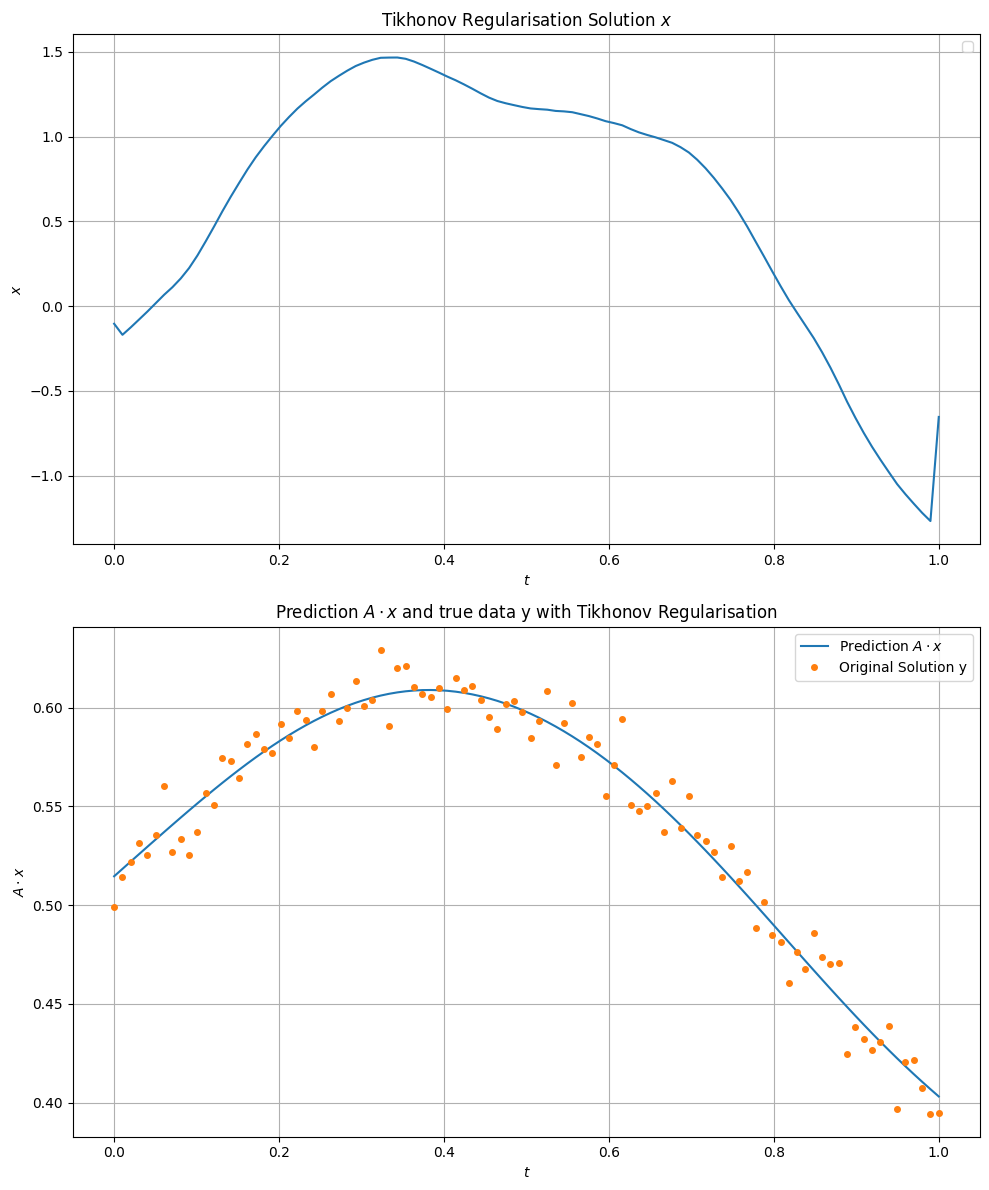

In [292]:
###testing and plotting the function as before


##solution
x = tikhonov_solution(mus[40])


## prediction
Ax = np.dot(A, x)

# plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# plotting the solution
axs[0].plot(t_vec, x)
axs[0].set_xlabel('$t$')
axs[0].set_ylabel('$x$')
axs[0].set_title('Tikhonov Regularisation Solution $x$')
axs[0].legend()
axs[0].grid(True)

# plotting the prediction Ax
axs[1].plot(t_vec, Ax, label = "Prediction $A \cdot x$")
axs[1].plot(t_vec, data_y, 'o', markersize=4, label = "Original Solution y")
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$A \cdot x$')
axs[1].set_title('Prediction $A \cdot x$ and true data y with Tikhonov Regularisation')
axs[1].legend()
axs[1].grid(True)

# show plot
plt.tight_layout()
plt.show()

Again, we see that the solutions are now much more smooth and do not overfit to the noisy data, which suggests that regularisation achieved more generalisable results. Here, we used the heuristically found values of the parameter $\mu$ by looking at the "knee" of the L-curve.

## Question 6

The data given in this question correspond to the ground truth $f(t)=\sin{\pi t} + \frac{\sin(2\pi t)}{2}$. Now using this define the vector   

$$\mathbf{x}^{\dagger}_{l}=f(t_{l}), \quad l=1,\cdots,k$$ 

and calculate for the same range of values for the parameter $\mu$ the following  quantity 

1. $e_{1}=||\mathbf{x}^{\dagger}-\mathbf{x}_{\mu}||^{2}_{2}$

How does the best regularised solution in this case compare to the ones you found in Q5? 

We now denote $\mathbf{x}_{TSVD,rank}$ the solution using the TSVD regularisation from Q4. Consider  the following quantity 

2. $e_{1}=||\mathbf{x}^{\dagger}-\mathbf{x}_{TSVD,rank}||^{2}_{2}$

Which value of rank gives the best result?  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;   &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   &nbsp; [**Marks 2**] 



# <mark>Solution:<mark>

<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\d'
<>:51: SyntaxWarning: invalid escape sequence '\d'
<>:53: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\d'
<>:51: SyntaxWarning: invalid escape sequence '\d'
<>:53: SyntaxWarning: invalid escape sequence '\d'
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/3269783971.py:41: SyntaxWarning: invalid escape sequence '\m'
  axs[0].plot(min_mu, min_error_1, 'ro', label=f'Minimum at $\mu$={min_mu:.1e}')  # add marker for minimum
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/3269783971.py:42: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_xlabel('$\mu$ 

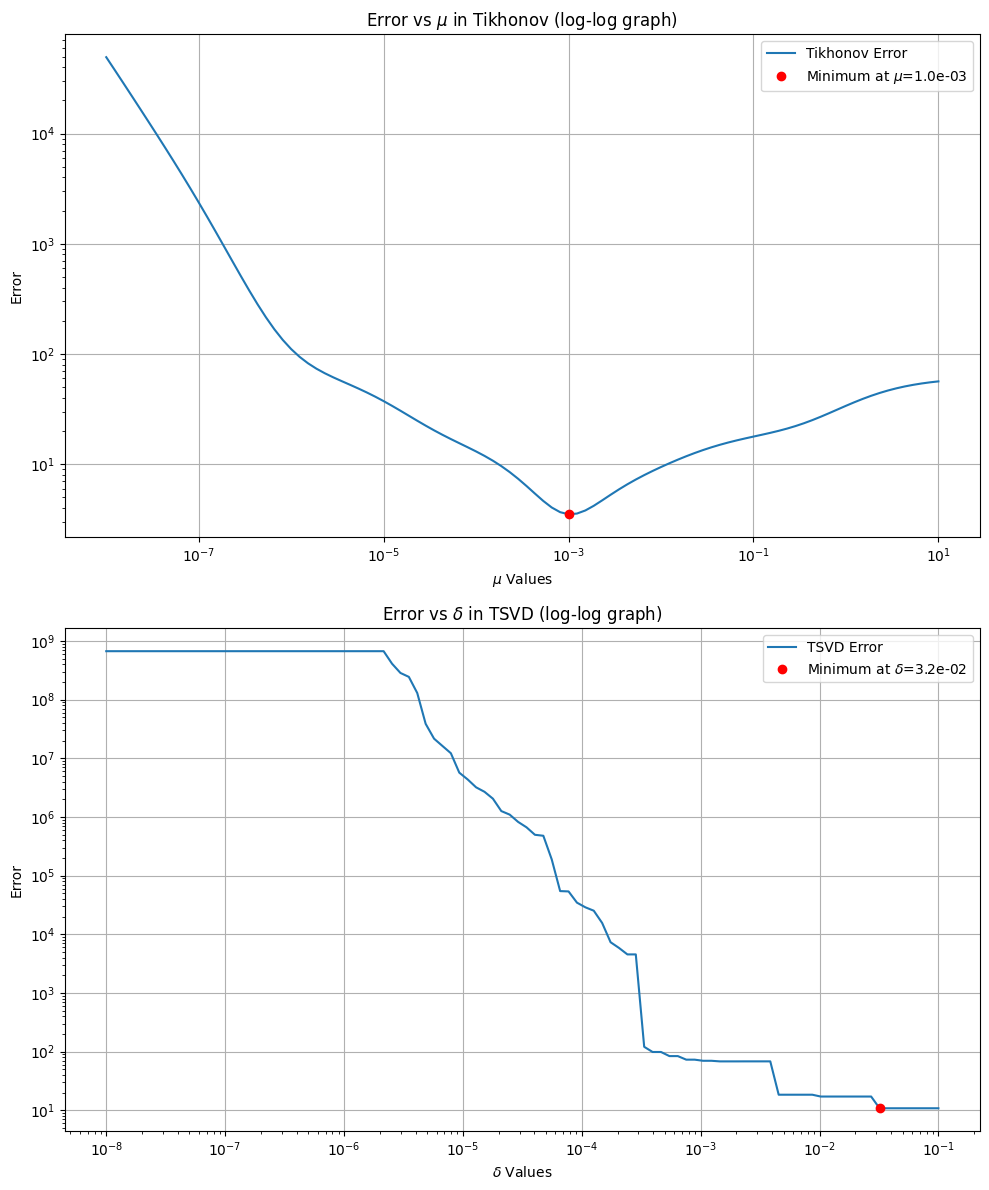

Minimum error in Tikhonov regularization at μ=1.0e-03
μ value found heuristically by L-curve=4.3e-05
Minimum error in TSVD occurs at δ=3.2e-02


In [293]:
###define the f function
def f(t):
    return np.sin(np.pi * t) + np.sin(2 * np.pi * t) / 2

t = np.linspace(0, 1, 100)
x_dagger = f(t)  ##create solution vector with the function

e_1 = []  ###empty list for errors with tikhonov

##iterate of all mu values and add the tikhonov solution and error to the list
for mu in mus:
    x_mu = tikhonov_solution(mu)
    e_1.append(np.linalg.norm(x_dagger - x_mu)**2)






e_2 = [] ###empty list for errors with tikhonov
deltas = np.logspace(-8, -1, 100) ##delta values logaithmically spaced between 1e-8 and 1e-1 

##iterate of all delta values and add the tikhonov solution and error to the list
for delta in deltas:
    x_delta = tsvd_solution(s_vals, delta)
    e_2.append(np.linalg.norm(x_dagger - x_delta)**2)



##get the minimum error and the minimising mu & delta for both cases
min_error_1, min_mu = min(zip(e_1, mus))
min_error_2, min_delta = min(zip(e_2, deltas))



##plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

##plotting tikhonov error vs mu
axs[0].loglog(mus, e_1, label='Tikhonov Error')
axs[0].plot(min_mu, min_error_1, 'ro', label=f'Minimum at $\mu$={min_mu:.1e}')  # add marker for minimum
axs[0].set_xlabel('$\mu$ Values')
axs[0].set_ylabel('Error')
axs[0].set_title('Error vs $\mu$ in Tikhonov (log-log graph)')
axs[0].legend()
axs[0].grid(True)

##plotting tsvd error vs delta
axs[1].loglog(deltas, e_2, label='TSVD Error')
axs[1].plot(min_delta, min_error_2, 'ro', label=f'Minimum at $\delta$={min_delta:.1e}')  # add marker for minimum
axs[1].set_xlabel('$\delta$ Values')
axs[1].set_ylabel('Error')
axs[1].set_title('Error vs $\delta$ in TSVD (log-log graph)')
axs[1].legend()
axs[1].grid(True)


##show plots
plt.tight_layout()
plt.show()

print(f"Minimum error in Tikhonov regularization at μ={min_mu:.1e}")
print(f"μ value found heuristically by L-curve={mus[40]:.1e}")

print(f"Minimum error in TSVD occurs at δ={min_delta:.1e}")



We see that the heuristically found mu differs from the $\mu$ value that minimises the log error, which is 0.001. Furthermore, we see that the delta rank that minimises our error is around 0.032.

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/1620291592.py:12: SyntaxWarning: invalid escape sequence '\d'
  axs[0].plot(t_vec, x_tsvd, label = "TSVD Solution with optimal $\delta$")
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/1620291592.py:16: SyntaxWarning: invalid escape sequence '\d'
  axs[0].set_title('TSVD Regularisation Solution $x$ with optimal $\delta$ vs True Solution')
/var/folders/vz/tyvljhm52ysb6jv0tv6x55pm0000gn/T/ipykernel_20769/1620291592.py:21: SyntaxWarning: invalid escape sequence '\m'
  axs[1].plot(t_vec, x_tik, label = "Tikh

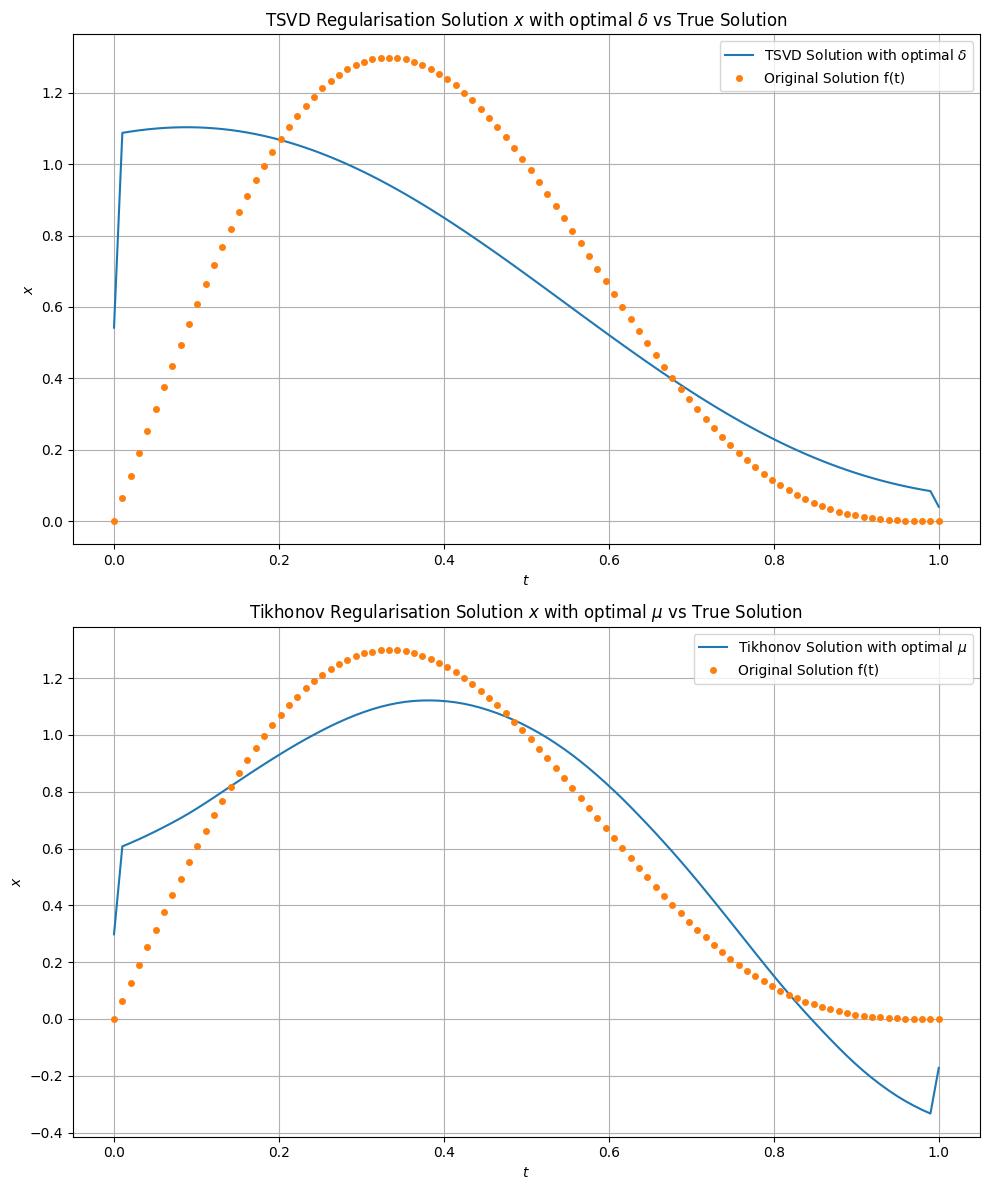

In [294]:

mu = 0.001
delta = 0.032

x_tik = tikhonov_solution(mu)
x_tsvd = tsvd_solution(s_vals, delta)


# plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# plotting the solution
axs[0].plot(t_vec, x_tsvd, label = "TSVD Solution with optimal $\delta$")
axs[0].plot(t_vec, x_dagger, 'o', markersize=4, label = "Original Solution f(t)")
axs[0].set_xlabel('$t$')
axs[0].set_ylabel('$x$')
axs[0].set_title('TSVD Regularisation Solution $x$ with optimal $\delta$ vs True Solution')
axs[0].legend()
axs[0].grid(True)

# plotting the solution
axs[1].plot(t_vec, x_tik, label = "Tikhonov Solution with optimal $\mu$")
axs[1].plot(t_vec, x_dagger, 'o', markersize=4, label = "Original Solution f(t)")
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$x$')
axs[1].set_title('Tikhonov Regularisation Solution $x$ with optimal $\mu$ vs True Solution')
axs[1].legend()
axs[1].grid(True)


# show plot
plt.tight_layout()
plt.show()

Compared with the least squares estimator, which yielded quite high values, we see that both regularisation strategies can somehow approximate the periodic behaviour of the signal, confined to a much smaller interval.